# Iterative Linear Quadratic Regulator

In [2]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pydrake.symbolic as sym

from control.iLQRController import iLQR
from control.models.car import CarModel

/usr/lib/python3/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


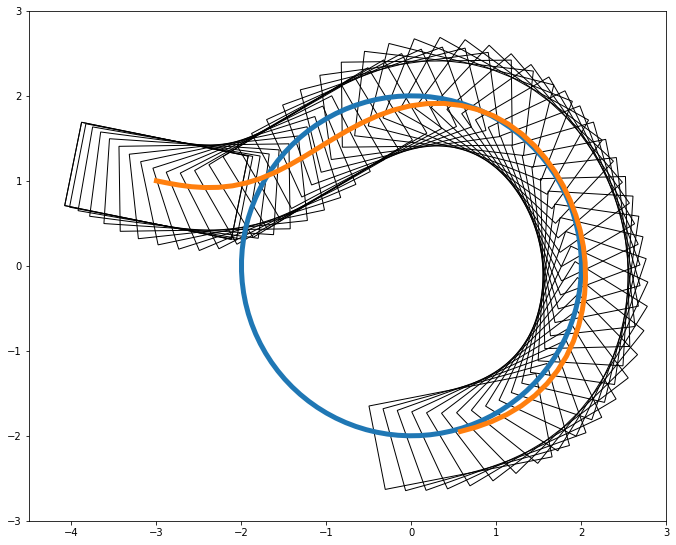

In [3]:
# Setup problem and call iLQR

x0 = np.array([-3.0, 1.0, -0.2, 0.0, 0.0])
iLQRParams = {"N": 40,
              "max_iter": 50,
              "regu_init": 100,
              "min_regu": 0.001,
              "max_regu": 10000,
              "max_linesearch_iters": 20
}
r = 2
v_target = 2
u_init_trj = np.random.randn(iLQRParams['N'] - 1, 2) * 0.0001

plant = CarModel(r, v_target)
controller = iLQR(plant, **iLQRParams)

x_trj = x0
u_trj = None
for n in range(50):
    x_ctrl, u_init_trj= controller.run_ilqr(x0, u_init_trj)
    x0 = x_ctrl[1,:]
    u_ctrl = u_init_trj[0, :]
    x_trj = np.vstack((x_trj, x_ctrl[1,:]))
    u_trj = np.vstack((u_trj, u_ctrl)) if u_trj is not None else u_ctrl

# print(u_trj)
plt.figure(figsize=(9.5, 8))
# Plot circle
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(r * np.cos(theta), r * np.sin(theta), linewidth=5)
ax = plt.gca()

# Plot resulting trajecotry of car
plt.plot(x_trj[:, 0], x_trj[:, 1], linewidth=5)
w = 2.0
h = 1.0

# Plot rectangles
for n in range(x_trj.shape[0]):
    rect = mpl.patches.Rectangle((-w / 2, -h / 2), w, h, fill=False)
    t = (
        mpl.transforms.Affine2D()
        .rotate_deg_around(0, 0, np.rad2deg(x_trj[n, 2]))
        .translate(x_trj[n, 0], x_trj[n, 1])
        + ax.transData
    )
    rect.set_transform(t)
    ax.add_patch(rect)
ax.set_aspect(1)
plt.ylim((-3, 3))
plt.xlim((-4.5, 3))
plt.tight_layout()